Leer los datos

In [1]:
import pandas as pd     
df = pd.read_csv('data.csv')

In [2]:
df.head()

,Nombre,Handle de Codeforces,Rating de Codeforces,Ranking IOI 2019,Ranking IOI 2020,Ranking IOI 2021,Ranking IOI 2022,Ranking IOI 2023,Ranking IOI 2024,Pais,Highest Rated Problem
0,Kangyang Zhou,orzdevinwang,3529.0,NaN,NaN,NaN,NaN,NaN,100.00,China,3500.0
1,Adam Gąsienica-Samek,adam_gs,2876.0,NaN,NaN,NaN,NaN,85.71,99.72,Poland,3100.0
2,Brian Xue,hyforces,2503.0,NaN,NaN,NaN,NaN,NaN,99.43,United States,3000.0
3,Daniel Weber,CommandMaster,2276.0,NaN,NaN,NaN,92.55,93.43,99.15,Israel,2400.0
4,Agastya Goel,gustergoose27,2448.0,NaN,NaN,NaN,NaN,98.29,99.15,United States,2500.0


In [3]:
# eliminar columna Handle de Codeforces
df.drop('Handle de Codeforces', axis=1, inplace=True)

In [4]:
print(len(df.loc[(df['Rating de Codeforces'].isna()) | (df['Rating de Codeforces'] == '')]) * 100 / len(df))

df_no_missing = df.loc[(df['Rating de Codeforces'].notna()) & (df['Rating de Codeforces'] != '')]


24.37673130193906


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Suponiendo que df_no_missing ya está cargado y contiene valores faltantes en 'Ranking IOI 2024'
# Selecciona las columnas relevantes
df_reduced = df_no_missing[['Rating de Codeforces','Pais', 'Ranking IOI 2024', 'Highest Rated Problem', 'Ranking IOI 2023']]  

# Verifica si hay valores faltantes en los datos
print("total  ", len(df_reduced))
print("Valores faltantes antes de imputar:")
print(df_reduced.isnull().sum())

# Inicializar el imputador KNN
knn_imputer = KNNImputer(n_neighbors=5)

# Aplicar KNNImputer para llenar los valores faltantes
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_reduced), columns=df_reduced.columns)

# Verifica si se imputaron los valores faltantes
print("\nValores faltantes después de imputar:")
print(df_imputed.isnull().sum())

# Define las características (X) y la variable objetivo (y)
X = df_imputed.drop('Ranking IOI 2024', axis=1)
y = df_imputed['Ranking IOI 2024']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)



total   273
Valores faltantes antes de imputar:
Rating de Codeforces       0
Ranking IOI 2024           0
Highest Rated Problem      1
Ranking IOI 2023         178
dtype: int64

Valores faltantes después de imputar:
Rating de Codeforces     0
Ranking IOI 2024         0
Highest Rated Problem    0
Ranking IOI 2023         0
dtype: int64


Ahora a crear el modelo

Testing Data Set

Resultados de validación cruzada:
MSE por fold: [220.34703086 172.50312666 107.91831217 336.76920575 207.28159488
 149.80642905  85.7283333  407.39632722 212.83599403 165.24525945]
MSE promedio (validación cruzada): 206.5832

Resultados en el conjunto de prueba:
Mean Squared Error (MSE): 133.0662
R-squared (R²): 0.8043


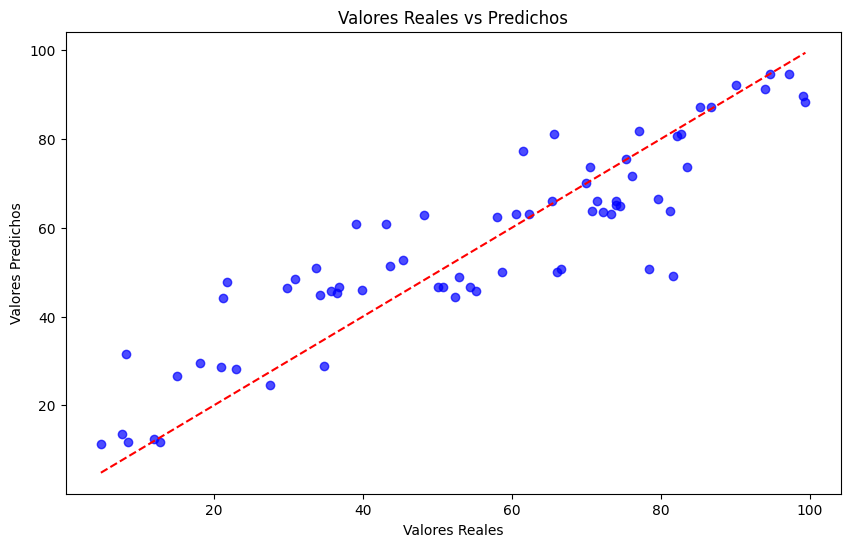

In [10]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
regressor = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=4)

# Configurar KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluar el modelo utilizando validación cruzada (usando MSE como métrica)
cv_scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convertir MSE negativo a positivo
mse_scores = -cv_scores
print("Resultados de validación cruzada:")
print(f"MSE por fold: {mse_scores}")
print(f"MSE promedio (validación cruzada): {mse_scores.mean():.4f}")

# Ajustar el modelo al conjunto completo de entrenamiento
regressor.fit(X, y)

# Realizar predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

# Evaluar el modelo usando el Error Cuadrático Medio (MSE) y el R-squared (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas en el conjunto de prueba
print("\nResultados en el conjunto de prueba:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Graficar los valores reales vs. los predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos')
plt.show()


MODELO FINAL CON Knn Para Valores faltantes de Ranking IOI 2022

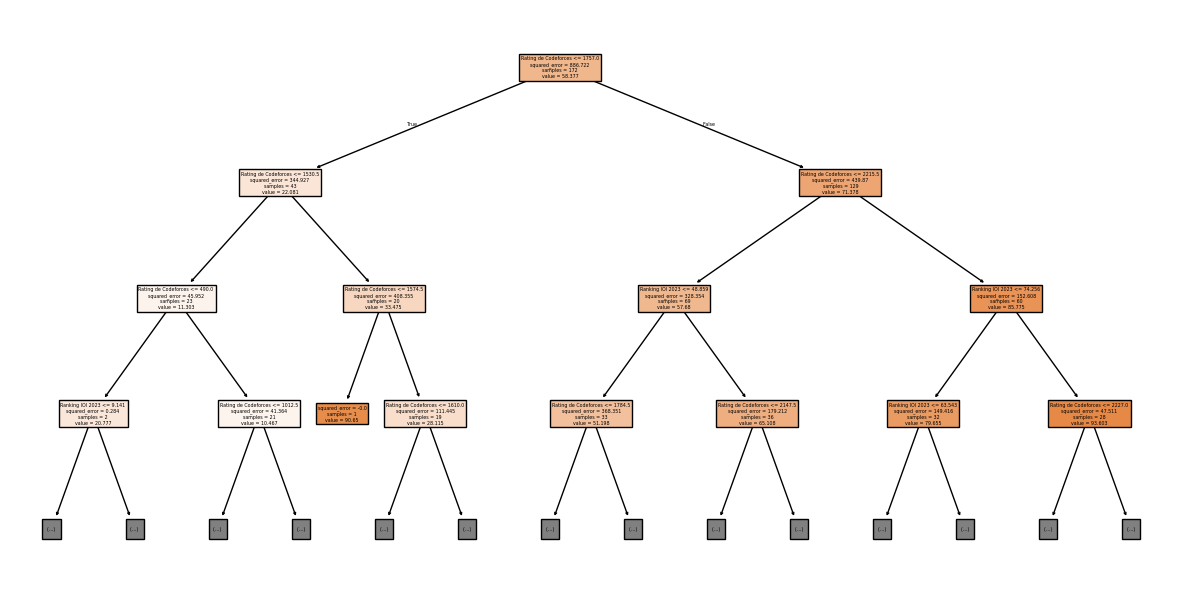

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Entrenar el modelo Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

# Acceder a un árbol individual dentro del bosque (por ejemplo, el primer árbol)
tree = regressor.estimators_[0]

# Graficar el árbol
plt.figure(figsize=(15, 7.5))
plot_tree(tree, filled=True, feature_names=X.columns, max_depth=3)  # max_depth para limitar la profundidad visualizada
plt.show()


Predecir

In [59]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Inicializar el modelo de árbol de regresión y ajustar al conjunto completo de datos
regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=8)

# Suponiendo que X e y ya están definidos y preparados
regressor.fit(X, y)

# Función para ingresar datos y hacer la predicción
def ingresar_datos_y_predecir():
    print("Ingresa los siguientes datos para predecir el Ranking IOI 2024:")
    
    # Ingresar los datos (conversión a tipo numérico en caso de ser necesario)
    rating_codeforces = float(input("Rating de Codeforces: "))
    highest_rated_problem = float(input("Highest Rated Problem: "))
    ranking_ioi_2023 = float(input("Ranking IOI 2023: "))

    # Crear un arreglo con los datos ingresados (en el mismo orden de las características X)
    nuevo_dato = np.array([[rating_codeforces, highest_rated_problem, ranking_ioi_2023]])

    # Hacer la predicción
    prediccion = regressor.predict(nuevo_dato)

    # Mostrar la predicción
    print(f"El Ranking IOI 2024 predicho es: {prediccion[0]:.4f}")

# Llamar la función para ingresar datos y predecir
ingresar_datos_y_predecir()


Ingresa los siguientes datos para predecir el Ranking IOI 2024:
El Ranking IOI 2024 predicho es: 47.7682


d:\mateoo\TESIS\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
